# IMPORTING REQUIRED LIBRARIES

In [80]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

IMPORTING THE DATASET

In [81]:
data = arff.loadarff('diabetes1.arff')
df = pd.DataFrame(data[0])
# df.head()
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'


WE ARE REMOVING THE LAST COLUMN AS IT IS NOT NEEDED

In [82]:
del df['class']
df

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


Normalizing the dataset

In [83]:
#normalising the dataset
data_norm = df.copy()

# apply normalization techniques
for column in data_norm.columns:
    data_norm[column] = (data_norm[column] - data_norm[column].min()) / (data_norm[column].max() - data_norm[column].min())

df=data_norm.copy()
# view normalized data
display(df)

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


we used pca to convert the 8 dimensions into two dimensions

In [84]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df)
df=pd.DataFrame(df)

pbX = df.iloc[:,[0,1]]

pby=[]
# pbX = df.iloc[:,[0,1,2,3,4,5,6,7]]

for i in range(len(df)) :
  pby.append(i+1)

pby=pd.DataFrame(pby)

Function to get nearing points

In [85]:
def getNeighbours(data, corePoint, eps):
    
    def EuclideanDistance(p1, p2):
        return  np.sqrt(np.sum(np.square(p1 - p2)))
    
    neighbours = []
    
    for i in range(len(data)):
        dist = EuclideanDistance(data[i], data[corePoint])
        
        if dist < eps:
            neighbours.append(i)
            
    return neighbours

The dbscan algo

In [86]:
def dbScan(data, eps, MinPts):

    def growCluster(data, labels, corePoint, 
                    neighbours, clusterID, eps, MinPts):
        labels[corePoint] = clusterID
        i = 0
        while i < len(neighbours):    
            nh = neighbours[i]

            if labels[nh] == -1:
                labels[nh] = clusterID
            elif labels[nh] == 0:
                labels[nh] = clusterID
                PnNeighbours = getNeighbours(data, nh, eps)

                if len(PnNeighbours) >= MinPts:
                    neighbours = neighbours + PnNeighbours
            i += 1
            
    labels = np.zeros(len(data))
    clusterID = 0
    
    for p in range(len(data)):
        if labels[p] == 0:
            neighbours = getNeighbours(data, p, eps)
            
            if len(neighbours) < MinPts:
                labels[p] = -1
            else:
                clusterID += 1
                growCluster(data, labels, p, neighbours, 
                            clusterID, eps, MinPts)
                
    return labels

In [87]:
def numNoise(labels):
 
    return int(abs(np.sum(labels[labels < 0])))
    
def nClusters(labels):
  
    return len(np.unique(labels[labels > 0]))

Plotting the cluster before dbscan:

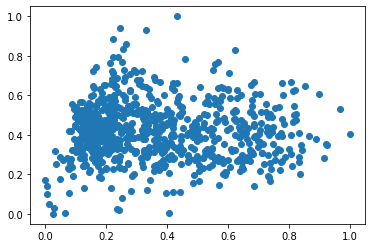

In [88]:
import matplotlib.pyplot as plt

for column in pbX.columns:
    pbX.loc[:, column] = (pbX[column].values - pbX[column].min())/(pbX[column].max() - pbX[column].min())
    
plt.scatter(pbX[0],pbX[1])
# plt.scatter(pbX['preg'],pbX['plas'],pbX['pres'],pbX['skin'],pbX['insu'],pbX['mass'],pbX['pedi'],pbX['age'])
plt.show()

dbScan parameters: dbScan(points, eps, minPts)

In [89]:
#for eps value=2 i am getting only one cluster, so i put eps=0.04 to show the working of the algo
labels = dbScan(pbX.values, 0.04, 5)
numClusters = nClusters(labels)
pby.loc[:,'predict_label'] = labels

Number of Cluster and Border Points:

In [90]:
print('number of clusters = {}'.format(numClusters))
print('number of border points = {}'.format(numNoise(labels)))

number of clusters = 4
number of border points = 78


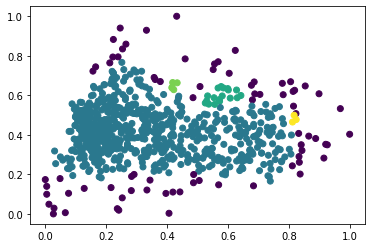

In [91]:
plt.scatter(pbX.iloc[:,0],pbX.iloc[:,1], c = labels)
plt.show()